# Sequence Preprocessing

In [1]:
seq = [
    [1, 2, 3, 4],
    [2, 3, 4, 5, 4, 2, 3],
    [4],
    [2, 4, 5]
]

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded = pad_sequences(seq, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)
padded

array([[0, 0, 0, 1, 2, 3, 4],
       [2, 3, 4, 5, 4, 2, 3],
       [0, 0, 0, 0, 0, 0, 4],
       [0, 0, 0, 0, 2, 4, 5]])

In [4]:
from tensorflow.keras.preprocessing.sequence import skipgrams

skipgrams(padded[0], vocabulary_size=6, window_size=1, negative_samples=1.0, shuffle=False,
         categorical=False, sampling_table=None, seed=None)

([[1, 2],
  [2, 1],
  [2, 3],
  [3, 2],
  [3, 4],
  [4, 3],
  [4, 5],
  [3, 2],
  [3, 4],
  [2, 1],
  [2, 2],
  [1, 5]],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [6]:
from numpy import array
from keras.preprocessing.sequence import TimeseriesGenerator

input_data = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
target = array([0, 0, 17, 18, 19, 20, 22, 21, 23, 14])

generator = TimeseriesGenerator(input_data, target, length=2, batch_size=1)

print('samples: %d' % len(generator))

for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

samples: 8
[[1 2]] => [17]
[[2 3]] => [18]
[[3 4]] => [19]
[[4 5]] => [20]
[[5 6]] => [22]
[[6 7]] => [21]
[[7 8]] => [23]
[[8 9]] => [14]


# TEXT Processing

In [7]:
text = 'Hello Ramsaheb, how are you?'

In [9]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

word = text_to_word_sequence(text, lower=True, split=' ')
print(word)
vocab_size = len(word)
print(vocab_size)

['hello', 'ramsaheb', 'how', 'are', 'you']
5


In [10]:
text_to_word_sequence(text, filters='#', lower=True, split=' ')

['hello', 'ramsaheb,', 'how', 'are', 'you?']

In [11]:
from tensorflow.keras.preprocessing.text import one_hot

one_hot(text, n=vocab_size*1.25, lower=True, split=' ')

[6.0, 4.75, 1.0, 5.5, 5.0]

In [12]:
from tensorflow.keras.preprocessing.text import hashing_trick

hashing_trick(text, n=vocab_size*1.25, hash_function='md5')

[1.25, 1.75, 1.0, 4.75, 4.25]

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

tk = Tokenizer()
tk.fit_on_texts(word)

In [14]:
print(tk.word_counts)
print(tk.document_count)
print(tk.word_index)
print(tk.word_docs)

OrderedDict([('hello', 1), ('ramsaheb', 1), ('how', 1), ('are', 1), ('you', 1)])
5
{'hello': 1, 'ramsaheb': 2, 'how': 3, 'are': 4, 'you': 5}
defaultdict(<class 'int'>, {'hello': 1, 'ramsaheb': 1, 'how': 1, 'are': 1, 'you': 1})


In [15]:
seq = tk.texts_to_sequences((word))
print(seq)



[[1], [2], [3], [4], [5]]


In [16]:
encoded_docs = tk.texts_to_matrix(word, mode='count')
print(encoded_docs)

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


# Image Preprocessing

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
import numpy as np

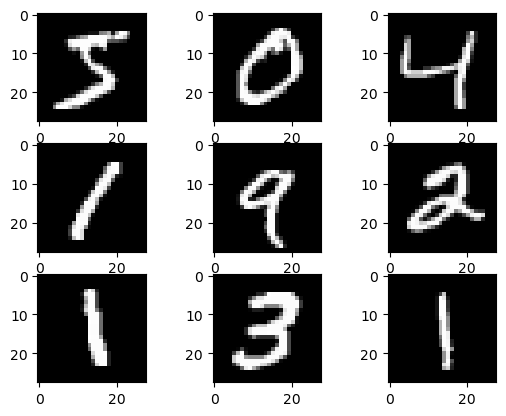

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [29]:
# Check initial shapes
print("x_train shape before:", x_train.shape)
print("x_test shape before:", x_test.shape)

# Reshape the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize values
x_train /= 255.0
x_test /= 255.0

# Verify final shapes
print("x_train shape after:", x_train.shape)
print("x_test shape after:", x_test.shape)


x_train shape before: (60000, 28, 28)
x_test shape before: (10000, 28, 28)
x_train shape after: (60000, 28, 28, 1)
x_test shape after: (10000, 28, 28, 1)


In [35]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    width_shift_range=0.0,
    height_shift_range=0.0,
    rotation_range=20,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',
    cval=0.0,
    rescale=None,
    data_format=None,
    validation_split=0.0,
    dtype=None
)


In [37]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(x_train)

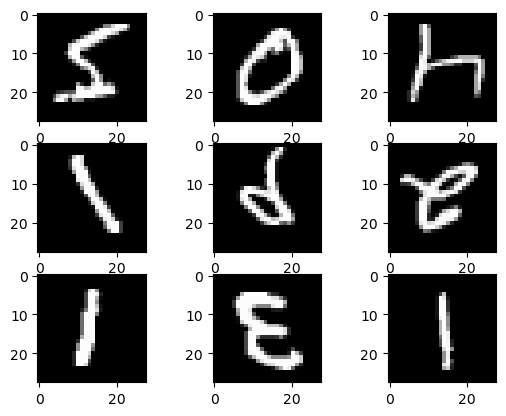

In [38]:
for x_batch, y_batch in datagen.flow(x_train, y_train, shuffle=False, batch_size=9):
    for i in range(9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break